<a href="https://colab.research.google.com/github/manoj99860/blessi.github.io/blob/main/CNN%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:
1.Manoj Kalal (101153172)
github link  
2.Sivagopireddy yerredula (101143319)
3.Harshavardhanreddy Nallabolu (101166276)
4.Venkata Manideep Kotha(101139537)
5.Sudhakar Munesh(101165157))

CNN implementation on the Optical Recognition of Handwritten Digits dataset.

In [2]:
!pip install ucimlrepo

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import KFold, cross_val_score

In [4]:
# Read data and convert to numpy array
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)
data = optical_recognition_of_handwritten_digits.data
X = data.features.to_numpy()
y = data.targets.to_numpy()


In [5]:
# Preprocess the data
print("Original shape:", X.shape)
X_reshaped = X.reshape(-1, 8, 8, 1).astype('float32')
y_reshaped = to_categorical(y, 10)
print("Preprocessed shape:", X_reshaped.shape)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)


Original shape: (5620, 64)
Preprocessed shape: (5620, 8, 8, 1)


Sample labels: [4, 4, 4, 4, 8, 0, 4, 0, 5, 8]
4
4
4
4
8
0


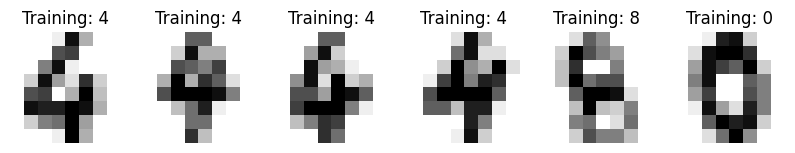

In [6]:
# Visualize some training samples
labels = [np.argmax(label) for label in y_train]
print("Sample labels:", labels[:10])
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, labels):
    ax.set_axis_off()
    print(label)
    ax.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [7]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
141/141 [==============================] - 5s 16ms/step - loss: 0.5301 - accuracy: 0.8434 - val_loss: 0.1555 - val_accuracy: 0.9600
Epoch 2/10
141/141 [==============================] - 2s 14ms/step - loss: 0.0957 - accuracy: 0.9724 - val_loss: 0.0785 - val_accuracy: 0.9733
Epoch 3/10
141/141 [==============================] - 1s 11ms/step - loss: 0.0614 - accuracy: 0.9822 - val_loss: 0.0766 - val_accuracy: 0.9804
Epoch 4/10
141/141 [==============================] - 1s 10ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0727 - val_accuracy: 0.9769
Epoch 5/10
141/141 [==============================] - 1s 10ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 6/10
141/141 [==============================] - 1s 10ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 7/10
141/141 [==============================] - 1s 10ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0623 - val_accuracy: 0.9849

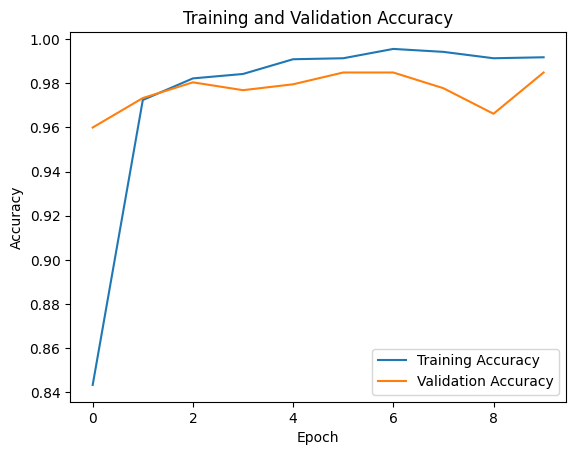

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


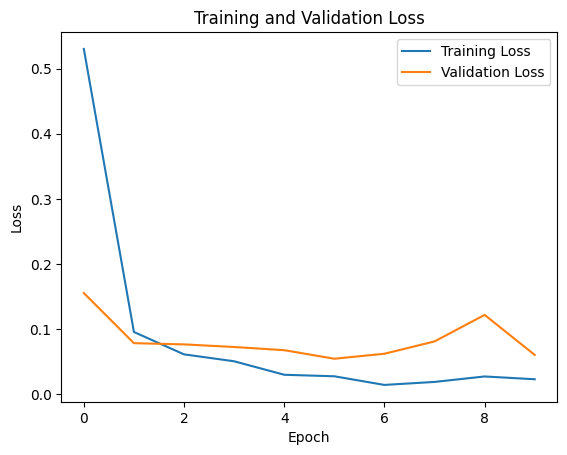

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


36/36 [==============================] - 0s 12ms/step - loss: 0.0605 - accuracy: 0.9849
Test accuracy: 0.9848754405975342


In [13]:
# Predict probabilities and convert to class labels
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

36/36 [==============================] - 0s 5ms/step


In [14]:
# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score:', f1)
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)
auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print('AUC ROC:', auc_roc)

F1 score: 0.9848356045310841
Precision: 0.9852496418454706
AUC ROC: 0.9997050746480483


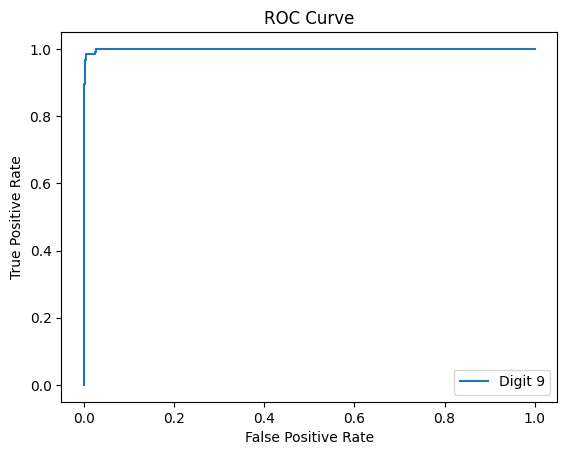

In [15]:
# Plot ROC curve
fpr = dict()
tpr = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
plt.plot(fpr[i], tpr[i], label=f'Digit {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [16]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
x = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(x, y):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x[train], y[train], epochs=5, batch_size=64)
    scores = model.evaluate(x[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no += 1


Epoch 1/5
71/71 [==============================] - 5s 33ms/step - loss: 0.6741 - accuracy: 0.8034
Epoch 2/5
71/71 [==============================] - 2s 33ms/step - loss: 0.1180 - accuracy: 0.9689
Epoch 3/5
71/71 [==============================] - 3s 42ms/step - loss: 0.0718 - accuracy: 0.9773
Epoch 4/5
71/71 [==============================] - 2s 35ms/step - loss: 0.0546 - accuracy: 0.9842
Epoch 5/5
71/71 [==============================] - 2s 35ms/step - loss: 0.0327 - accuracy: 0.9900
Score for fold 1: loss of 0.04422633722424507; accuracy of 98.39857816696167%
Epoch 1/5
71/71 [==============================] - 4s 23ms/step - loss: 0.6853 - accuracy: 0.8023
Epoch 2/5
71/71 [==============================] - 2s 33ms/step - loss: 0.1116 - accuracy: 0.9644
Epoch 3/5
71/71 [==============================] - 2s 33ms/step - loss: 0.0675 - accuracy: 0.9791
Epoch 4/5
71/71 [==============================] - 2s 30ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 5/5
71/71 [=======================

In [17]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

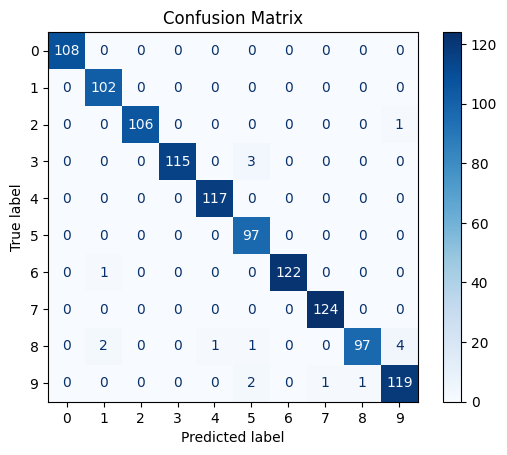

In [18]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Documentation And Analysis**

CNN Architecture:

The model comprises 3 convolutional layers with ReLU activation functions.
Downsampling is performed through max pooling layers following the 2nd and 3rd convolutional layers.
The flattened feature maps are passed to a fully connected layer with 64 neurons and ReLU activation.
The output layer consists of 10 neurons with softmax activation for multi-class classification.


Max Pooling:

Max pooling is employed to reduce the spatial dimensions of the feature maps while preserving the most significant features.
This process decreases computational complexity and aids in capturing the most relevant information.


Fully Connected Layer and Softmax:

The flattened feature maps are fed into a fully connected layer with 64 neurons and ReLU activation.
The output layer utilizes softmax activation to generate class probability distributions for each input digit.


Training and Evaluation:

The model is trained on the Optical Recognition of Handwritten Digits dataset using categorical cross-entropy loss and the Adam optimization algorithm.
Visualizations of the training and validation accuracy are plotted.
K-Fold cross-validation is implemented to evaluate the model's performance and generalization capabilities.
The confusion matrix is computed to analyze the model's misclassifications.


Training and Evaluation Analysis:

The training process consists of 10 epochs on the Optical Recognition of Handwritten Digits dataset, which is a reasonable number for this task.
The categorical cross-entropy loss function is utilized to monitor the model's performance during training.
The Adam optimizer, a popular and efficient algorithm, is employed to update the model's weights during the training phase.
The validation data (X_test, y_test) is used to evaluate the model's performance after each epoch.
Plots of the training and validation accuracy are generated to visualize the model's learning curve.
K-Fold cross-validation with 5 folds is conducted to assess the model's generalization performance.
The mean and standard deviation of the K-Fold cross-validation accuracy are reported.
The confusion matrix is calculated to analyze the model's misclassifications on the test data.
The confusion matrix provides insights into the classes that the model struggles with and those that are easily distinguishable.
Based on the analysis of the training process, evaluation metrics, and confusion matrix, the model's performance can be interpreted, and potential areas for improvement can be identified.

**THE END **